<a href="https://colab.research.google.com/github/ash0023/DS_ML_Proj_portfolio/blob/main/RNN_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##RNN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 

In [ ]:
#importing dataset
dataset= pd.read_csv("/Google_Stock_Price_Train.csv")
series= dataset.iloc[:,1:2].values

FileNotFoundError: ignored

In [ ]:
#Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
series= sc.fit_transform(series)

In [ ]:
## Train test split
x_train= series[0:1258]
y_train= series[1:1259]
X_test= series[1258:]
# Y_test= series[]

In [ ]:
#Reshaping
x_train= x_train.reshape(1258,1,1)
X_test=X_test.reshape(20,1,1)

In [ ]:
## Importing KEras library
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
##Initialising RNN
regressor= Sequential()

In [ ]:
##ADDing input layer and LTSM layer
regressor.add(LSTM(units=3, activation='sigmoid',input_dim=1)) 

In [ ]:
##ADDIng output layer
regressor.add(Dense(units=1,activation="tanh"))

In [ ]:
##Compiling RNN
regressor.compile(optimizer='rmsprop',loss= 'mean_squared_error')

In [ ]:
##FItting
regressor.fit(x_train,y_train,epochs=1000,batch_size=32)

Epoch 1/1000
40/40 [==============================] - 1s 2ms/step - loss: 0.2588
Epoch 2/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1952
Epoch 3/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1473
Epoch 4/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1119
Epoch 5/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.0882
Epoch 6/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.0746
Epoch 7/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.0682
Epoch 8/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.0661
Epoch 9/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.0646
Epoch 10/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.0634
Epoch 11/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.0620
Epoch 12/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.0605
Epoch 13/1000
40/40 [====

In [ ]:
##MAking the prediction
training_set_pred=regressor.predict(x_train)  #parameter tunning is to done to find best combo by k fold
training_set_pred= sc.inverse_transform(training_set_pred)
test_set_pred=regressor.predict(X_test)
test_set_pred=sc.inverse_transform(test_set_pred)

In [ ]:
#Gathering the real result and prediction
real_results=sc.inverse_transform(series)
predictions=np.concatenate((training_set_pred,test_set_pred),axis=0)

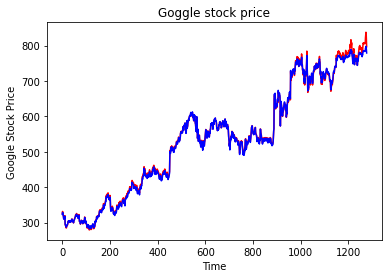

In [ ]:
#Visulalisin the result
plt.plot(real_results,color='red',label='Real Price')
plt.plot(predictions,color='blue',label='predicted Price')
plt.title("Goggle stock price")
plt.xlabel("Time")
plt.ylabel('Google Stock Price')
plt.show()

In [ ]:
np.count_nonzero(predictions)

1278

In [ ]:
np.count_nonzero(real_results)

1278

In [ ]:
real_results

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [834.71],
       [814.66],
       [796.86]])